
Training with batch gradient descent
Epoch 1/50 - Loss: 0.6681
Epoch 2/50 - Loss: 0.6463
Epoch 3/50 - Loss: 0.6273
Epoch 4/50 - Loss: 0.6106
Epoch 5/50 - Loss: 0.5960
Epoch 6/50 - Loss: 0.5830
Epoch 7/50 - Loss: 0.5715
Epoch 8/50 - Loss: 0.5612
Epoch 9/50 - Loss: 0.5520
Epoch 10/50 - Loss: 0.5437
Epoch 11/50 - Loss: 0.5361
Epoch 12/50 - Loss: 0.5292
Epoch 13/50 - Loss: 0.5230
Epoch 14/50 - Loss: 0.5172
Epoch 15/50 - Loss: 0.5120
Epoch 16/50 - Loss: 0.5071
Epoch 17/50 - Loss: 0.5026
Epoch 18/50 - Loss: 0.4984
Epoch 19/50 - Loss: 0.4945
Epoch 20/50 - Loss: 0.4909
Epoch 21/50 - Loss: 0.4876
Epoch 22/50 - Loss: 0.4844
Epoch 23/50 - Loss: 0.4814
Epoch 24/50 - Loss: 0.4787
Epoch 25/50 - Loss: 0.4760
Epoch 26/50 - Loss: 0.4736
Epoch 27/50 - Loss: 0.4712
Epoch 28/50 - Loss: 0.4690
Epoch 29/50 - Loss: 0.4669
Epoch 30/50 - Loss: 0.4650
Epoch 31/50 - Loss: 0.4631
Epoch 32/50 - Loss: 0.4613
Epoch 33/50 - Loss: 0.4596
Epoch 34/50 - Loss: 0.4580
Epoch 35/50 - Loss: 0.4564
Epoch 36/50 - Loss: 0.4550

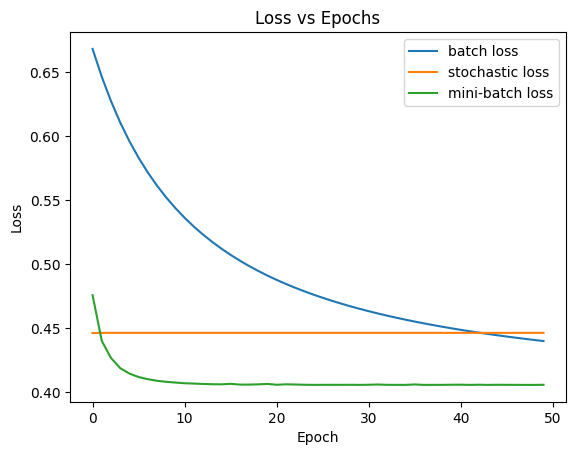

In [6]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, epochs=1000, optimizer='batch', batch_size=32):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.optimizer = optimizer
        self.batch_size = batch_size

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        loss = -1/m * np.sum(y*np.log(y_pred + 1e-15) + (1 - y)*np.log(1 - y_pred + 1e-15))
        return loss

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # Add bias term
        self.theta = np.zeros(X.shape[1])
        self.losses = []

        for epoch in range(self.epochs):
            if self.optimizer == 'batch':
                self._batch_gradient_descent(X, y)
            elif self.optimizer == 'stochastic':
                self._stochastic_gradient_descent(X, y)
            elif self.optimizer == 'mini-batch':
                self._mini_batch_gradient_descent(X, y)

            y_pred = self.sigmoid(np.dot(X, self.theta))
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)
            print(f"Epoch {epoch+1}/{self.epochs} - Loss: {loss:.4f}")

    def _batch_gradient_descent(self, X, y):
        m = len(y)
        y_pred = self.sigmoid(np.dot(X, self.theta))
        gradient = np.dot(X.T, (y_pred - y)) / m
        self.theta -= self.learning_rate * gradient

    def _stochastic_gradient_descent(self, X, y):
        m = len(y)
        for i in range(m):
            xi = X[i].reshape(1, -1)
            yi = y[i]
            y_pred = self.sigmoid(np.dot(xi, self.theta))
            gradient = np.dot(xi.T, (y_pred - yi))
            self.theta -= self.learning_rate * gradient.flatten()

    def _mini_batch_gradient_descent(self, X, y):
        m = len(y)
        indices = np.arange(m)
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, self.batch_size):
            X_batch = X[i:i+self.batch_size]
            y_batch = y[i:i+self.batch_size]
            y_pred = self.sigmoid(np.dot(X_batch, self.theta))
            gradient = np.dot(X_batch.T, (y_pred - y_batch)) / len(y_batch)
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        y_pred = self.sigmoid(np.dot(X, self.theta))
        return (y_pred >= 0.5).astype(int)


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=0, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

optimizers = ['batch', 'stochastic', 'mini-batch']

for opt in optimizers:
    print(f"\nTraining with {opt} gradient descent")
    model = LogisticRegressionCustom(learning_rate=0.1, epochs=50, optimizer=opt, batch_size=32)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    plt.plot(model.losses, label=f'{opt} loss')

plt.title("Loss vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
